In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(55,56)]
i =0
result = np.zeros((2160,601,3600))

In [3]:
for yy in years:
    for mm in months:
        #data=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ice300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.'+yy+'-'+mm +'.aice.nc')
        #cmpr_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.0323-09.aice.nc
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.SALT.nc')
        plotvar = data.variables['SALT'][0,32,:,:]
        #plotvar = data.variables['HMXL'][0,:,:]
        #lont = data.variables['lont_bounds'][:,:,0]
        #latt = data.variables['latt_bounds'][:,:,0]
        #lont = lont[248:344,700:1400]
        #latt = latt[248:344,700:1400]
        plotvar = plotvar[:,:]
#       lont = lont[180:320,500:1200]
#        latt = latt[180:320,500:1200]
#        plotvar = plotvar[180:320,500:1200]
        aveplot = plotvar
        
        result[i] = aveplot
        
        i = i + 1

In [4]:
re = np.nanmean(result,axis=0)

In [5]:
        datau=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0021-01.UVEL.nc')
        plotvaru = datau.variables['UVEL'][0,1,:,:]
        lontu = datau.variables['ULONG'][:,:]
        lattu = datau.variables['ULAT'][:,:]
        re[re == -1] = np.nan
        re[re >  1000] = np.nan

In [6]:
        result[result == -1] = np.nan
        result[result >  1000] = np.nan

In [7]:
aaa =   np.std(result,axis=0)

In [8]:
        #nice_cmap=plt.get_cmap('ocean')
        #nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)nice_cmap=plt.get_cmap('jet')
        nice_cmap=plt.get_cmap('jet')
        lev_cmap = nice_cmap([10,20,30,40,50,60,70,80,90,100,110,120,140,150,160,170,180,190,200,210,220,230,240,290,300])
        #new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
        new_cmap = cols.ListedColormap(lev_cmap,"jet")
        #lev_cmap = nice_cmap([0,500,1000,1500,2000,2500,3000])
        #new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
        nice_levels = [-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3]
        #nice_levels = [0,40,80,120,200,300]
        #nice_levels = [0,10,20,30,40,50,60,70,80,90,100]
        norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

In [9]:
re[re == -1000] = np.nan

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'spacing'
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


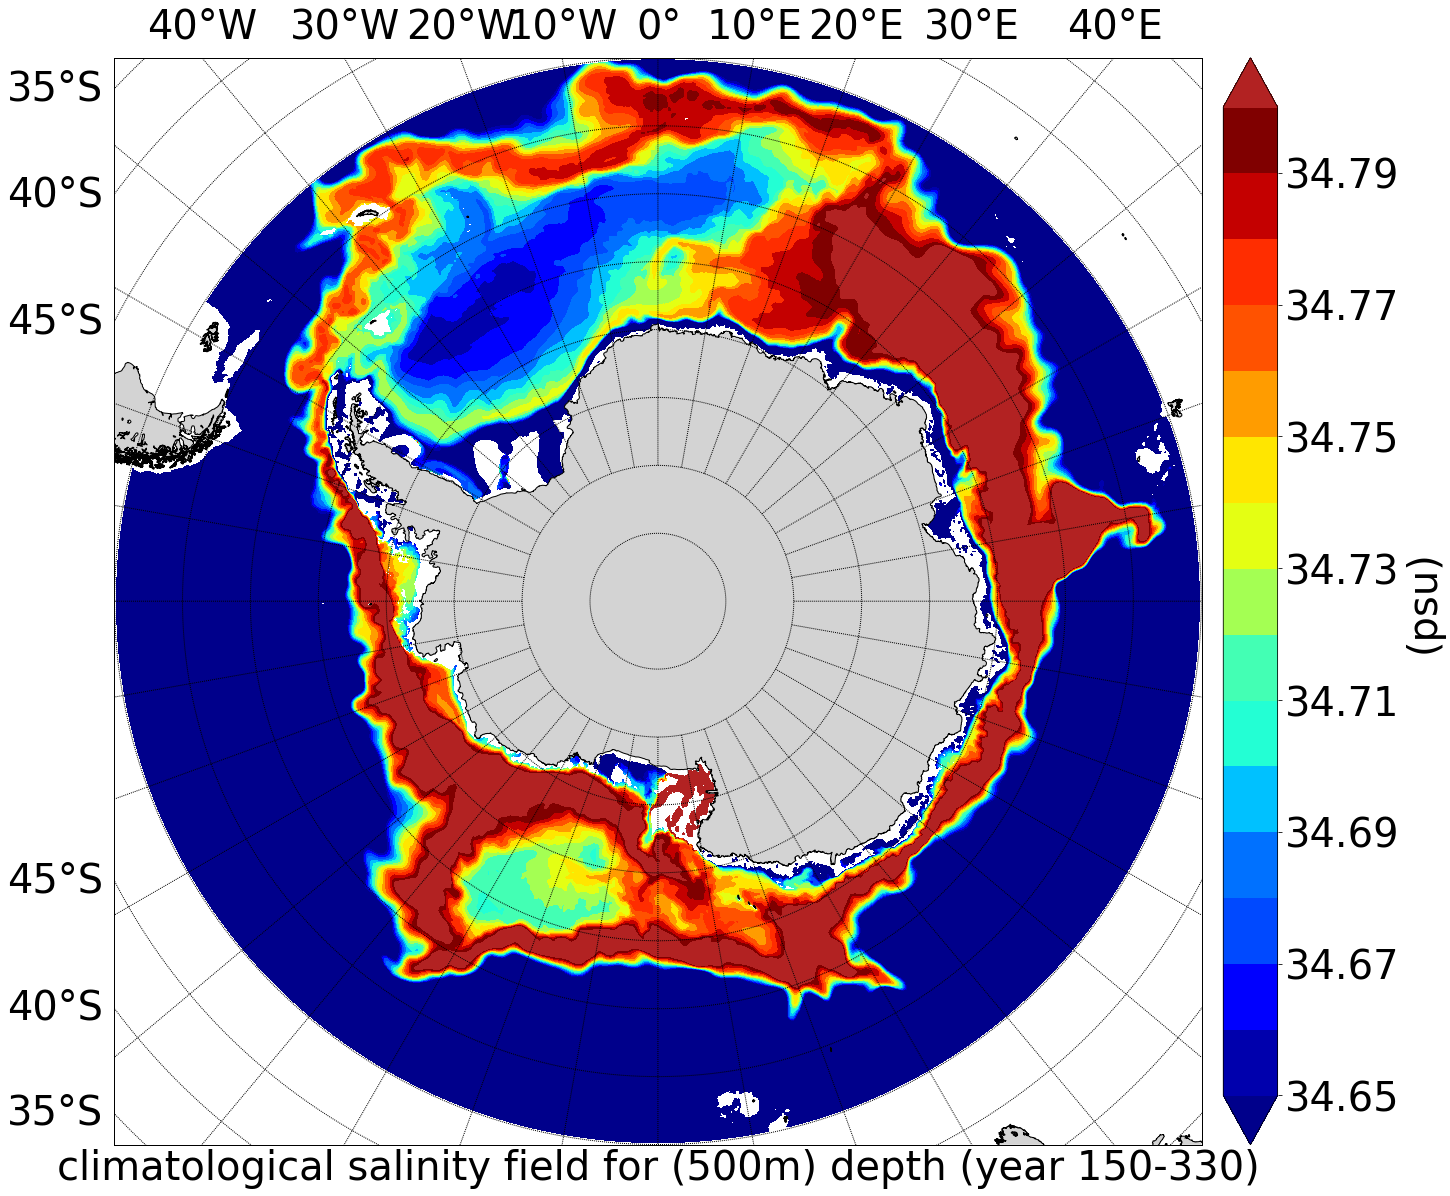

In [10]:
        nice_levels = [34.65,34.66,34.67,34.68,34.69,34.70,34.71,34.72,34.73,34.74,34.75,34.76,34.77,34.78,34.79,34.80]
        #nice_levels = [34.60,34.61,34.62,34.63,34.64,34.65,34.66,34.67,34.68,34.69,34.70,34.71,34.72]
        plt.figure(figsize=(25,20))
        my_font = {'fontname':'Cambria', 'size':'40'}

        map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
                     width = 8900000,height = 8900000,resolution ='h') 
        map.drawcoastlines()
        map.fillcontinents(color = 'lightgrey')
        map.drawmapboundary(color='black')
 
        map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
        map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

       
        xq,yq=map(lontu,lattu)

        CP = map.contourf(xq,yq,re,cmap = new_cmap,spacing = 'uniform',levels = nice_levels,extend='both')
       
        CP.cmap.set_over("firebrick")
        CP.cmap.set_under('darkblue')
        cbar =map.colorbar(CP)#,extend='both',extendfrac='auto',ticks= nice_levels)
      
        cbar.ax.tick_params(labelsize=40) 
        cbar.set_label('(psu)', **my_font)
        plt.xlabel('climatological salinity field for (500m) depth (year 150-330)',**my_font)
        plt.savefig("/scratch/user/xiliangdiao/plot/salt527ave(21-321)500m")

In [11]:
aaa[aaa == 0] = np.nan

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'spacing'


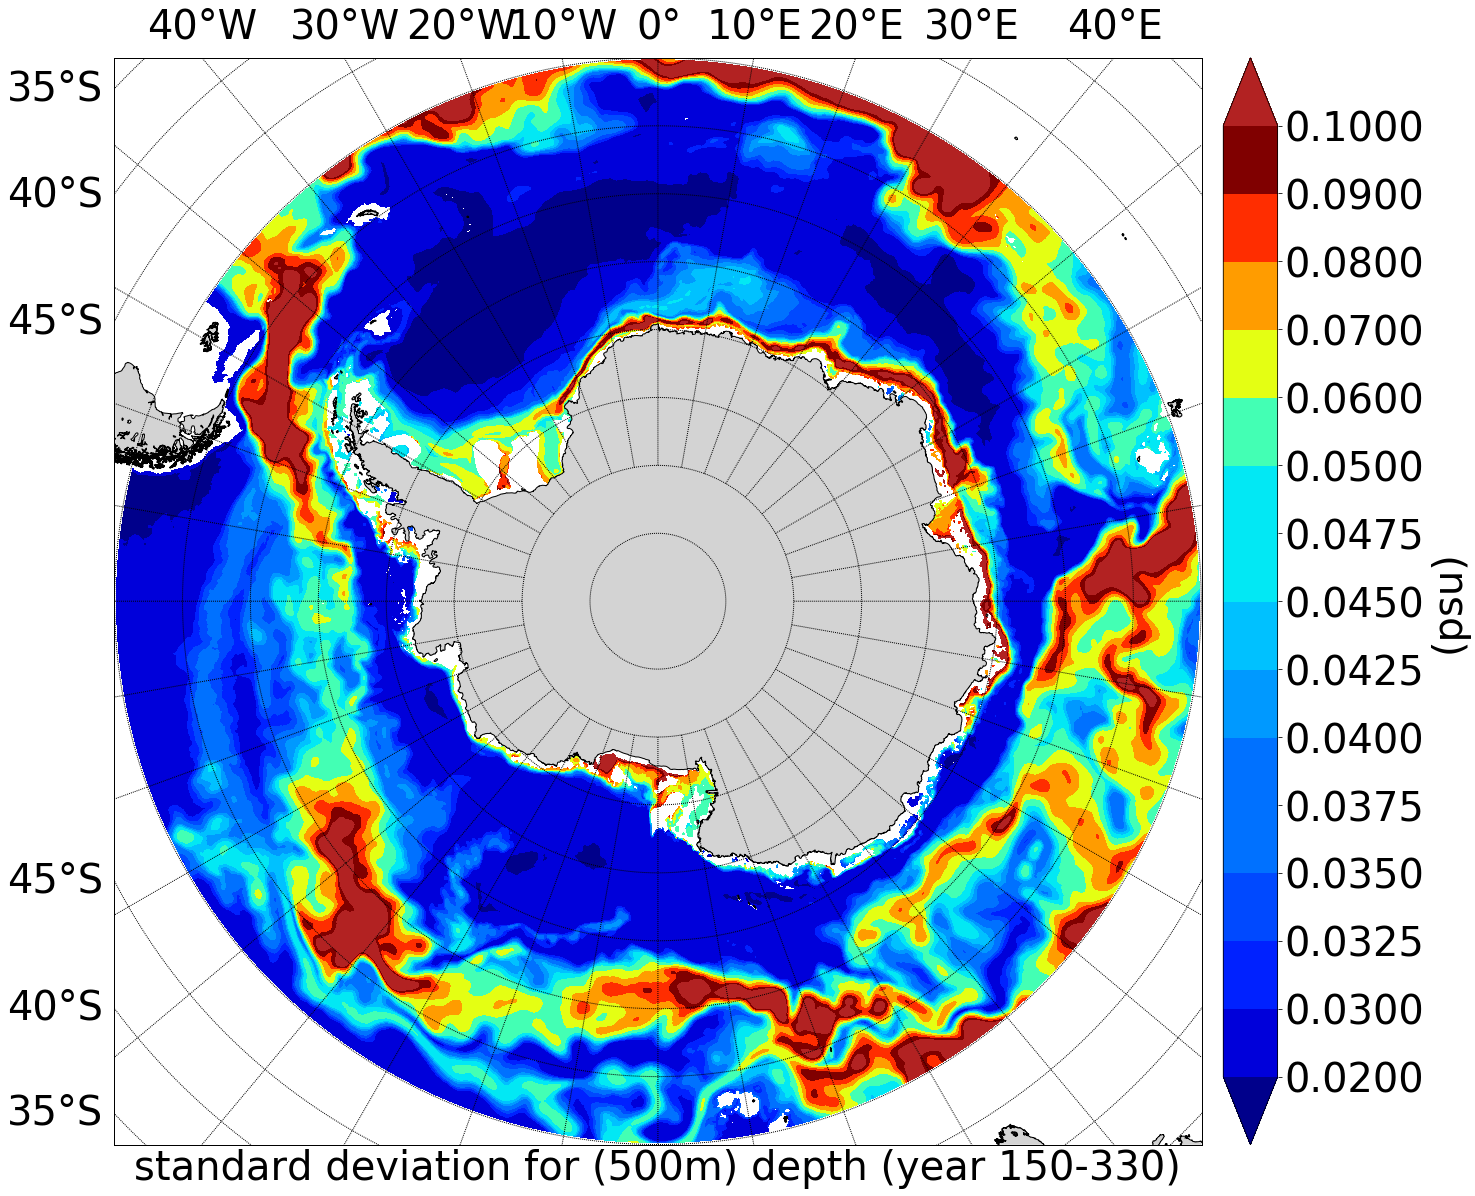

In [12]:
        nice_levels = [0.02,0.03,0.0325,0.035,0.0375,0.04,0.0425,0.045,0.0475,0.05,0.06,0.07,0.08,0.09,0.1]
        plt.figure(figsize=(25,20))
        my_font = {'fontname':'Cambria', 'size':'40'}

        map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
                     width = 8900000,height = 8900000,resolution ='h') 
        map.drawcoastlines()
        map.fillcontinents(color = 'lightgrey')
        map.drawmapboundary(color='black')
 
        map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
        map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

       
        xq,yq=map(lontu,lattu)

        CP = map.contourf(xq,yq,aaa,cmap = new_cmap,spacing = 'uniform',levels = nice_levels,extend='both')
       
        CP.cmap.set_over('firebrick')
        CP.cmap.set_under('darkblue')
        cbar =map.colorbar(CP,extend='both',extendfrac='auto',ticks= nice_levels)
        cbar.ax.tick_params(labelsize=40)
        cbar.set_label('(psu)', **my_font)
        plt.xlabel('standard deviation for (500m) depth (year 150-330)',**my_font)
        plt.savefig("/scratch/user/xiliangdiao/plot/stdsalt(150-330)500")